In [2]:
%run vizFunc.py

# database path
db_path = config.get('statsbomb_db_path')

# create an sqlalchemy engine to connect to the SQLite database
engine = create_engine(f'sqlite:///{db_path}')

# instantiate a parser object
parser = Sbopen()

In [30]:
# RUN ONLY WHEN WORKING A DIFFERENT PLAYER/SEASON
# connect to the sqlite database
conn = sqlite3.connect(db_path)

with open('data/find_matchid_preset.sql') as inserts:
    q1 = inserts.read()

# retrieve all matchdata
seasonId = 90 # only for reporting, change in .sql file
playerId = 5503 # only for reporting, change in .sql file
query = q1
print(query)
# use the connection and query to create a dataframe
matches = pd.read_sql_query(query, conn)

# close the connection
conn.close()

/* Retrieve all matches and lineups for the target season & player  */
WITH JOINT AS (
				SELECT	m.competition_id
						, m.competition_name
						, m.season_id
						, m.season_name
						, l.*
				FROM lineup l
				LEFT JOIN match m
				ON m.match_id = l.match_id
				)

SELECT 
					m.*
					, j.player_id	
					, j.player_name	
					, j.player_nickname
					, j.jersey_number
					, j.team_id
					, j.team_name
					, j.country_id
FROM (
		SELECT *
		FROM JOINT
		WHERE 1=1
		AND season_id = 26
--		AND player_id = 5503
	)  J
LEFT OUTER JOIN match m 
USING (match_id)
WHERE J.MATCH_ID IS NOT NULL



## MESSI'S 2014-2015
---

In [31]:
# RUN ONLY WHEN WORKING A DIFFERENT PLAYER/SEASON
matches.head()
match_list = matches.match_id.unique().tolist()

[18242,
 267183,
 265835,
 266838,
 265963,
 266117,
 266916,
 267197,
 70264,
 70273,
 267301,
 265896,
 265866,
 267400,
 266406,
 267085,
 267561,
 266148,
 266045,
 70303,
 266240,
 267597,
 266794,
 267343,
 266631,
 266320,
 266230,
 266525,
 266560,
 266846,
 266531,
 266921,
 267499,
 266741,
 266871,
 266967,
 266929,
 266770,
 266142]

In [9]:
%%time # RUN ONLY WHEN WORKING A DIFFERENT PLAYER-SEASON
event_df_list = []
for i, match in enumerate(match_list):
    print(f"{i} - ENTERED :",match)
    event_df_list.append(parser.event(match)[0])
    print("event appended\n---------------------")
print("appending complete")

df_event = pd.concat(event_df_list)
print("Concatenation done")

# in order not to do the same data retrieval over and over, using the to_sql function to write the dataframe to the sqlite database
df_event.to_sql('event_stg', engine, if_exists='replace', index=False)

0 - ENTERED : 18242
event appended
---------------------
1 - ENTERED : 267183
event appended
---------------------
2 - ENTERED : 265835
event appended
---------------------
3 - ENTERED : 266838
event appended
---------------------
4 - ENTERED : 265963
event appended
---------------------
5 - ENTERED : 266117
event appended
---------------------
6 - ENTERED : 266916
event appended
---------------------
7 - ENTERED : 267197
event appended
---------------------
8 - ENTERED : 70264
event appended
---------------------
9 - ENTERED : 70273
event appended
---------------------
10 - ENTERED : 267301
event appended
---------------------
11 - ENTERED : 265896
event appended
---------------------
12 - ENTERED : 265866
event appended
---------------------
13 - ENTERED : 267400
event appended
---------------------
14 - ENTERED : 266406
event appended
---------------------
15 - ENTERED : 267085
event appended
---------------------
16 - ENTERED : 267561
event appended
---------------------
17 - ENTER

146390

In [25]:
%%time
# SELECTs events from previously recorded event data in a staging table
# connect & read
conn = sqlite3.connect(db_path)
# the events of matches
df_event = pd.read_sql_query(
    '''SELECT * 
    FROM event_stg;
    ''', conn)
print(len(df_event))
# the lineups & match data
with open('data/find_matchid_preset.sql') as inserts:
    lineup_q = inserts.read()
lineups = pd.read_sql_query(lineup_q, conn)

# close the connection
conn.close()
# merge the lineups with
df_event = df_event.merge(lineups,on=["player_id","match_id"],how="left")
print(print(df_event.info()))
print(len(df_event))
df_event.head()

146390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146390 entries, 0 to 146389
Columns: 145 entries, id to country_id
dtypes: float64(78), int64(10), object(57)
memory usage: 161.9+ MB
None
None
146390
CPU times: user 1.97 s, sys: 138 ms, total: 2.11 s
Wall time: 2.14 s


,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,referee_id,referee_name,referee_country_id,referee_country_name,player_name_y,player_nickname,jersey_number,team_id_y,team_name_y,country_id
0,909010e7-ef6c-4a0d-b314-abfad5659cd5,1,1,00:00:00.000000,0,0,1,0.0,18242,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ae41ae3a-46d6-4dc2-a135-25bcbb5b3abd,2,1,00:00:00.000000,0,0,1,0.0,18242,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6b3a74c6-b09e-4e74-a628-9dce9aee1ac7,3,1,00:00:00.000000,0,0,1,0.0,18242,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dd747f4e-e94f-442c-8d5f-5e040a59673a,4,1,00:00:00.000000,0,0,1,0.0,18242,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8bbcabd0-2908-4bbf-b737-b078b6f1c729,1896,1,00:00:00.000000,0,0,98,NaN,18242,42,...,581.0,Cüneyt Çakιr,233.0,Turkey,Paul Pogba,Paul Pogba,6.0,224.0,Juventus,78.0


In [ ]:
pitch = Pitch(pitch_type='statsbomb',
                pad_top = 10,
                line_zorder=2,
                line_color='#cfcfcf',
                pitch_color='#131722')

In [ ]:
class footyviz:
    def __init__(self, data, pitch):
        # two eminent components, data and pitch
        self.master = data
        self.data_stg = data
        self.pitch = pitch
        self.fig = None
        self.axs = None
        self.pitchLengthX = 120 # predefined pitch length, changeable
        self.pitchWidthY = 80 # predefined pitch width, changeable
        self.figSizeX = 10 # predefined figure size x, changeable
        self.figSizeY = 7.727 # predefined figure size y, changeable
        self.zorder = 3 # starting zorder, will change in every addition
        self.backgroundColor = pitch.pitch_color
        self.scattyDotColor = 'grey'
        self.title_font = {'size':'20', 'color':'black', 'weight':'bold'}
        self.font_url = config["fonts"]["bebas_neue"]
        self.font_url_alt = config["fonts"]["roboto_bold"]
        self.seasonNameList = [value for value in self.data.season_name.unique() if not (isinstance(value, float) and np.isnan(value))]
        self.playerName = None
        # create a colormap
        self.colors = [(0, self.backgroundColor), (0.5, "yellow"), (1, "red")]
        self.colormap = LinearSegmentedColormap.from_list("custom_colormap", self.colors, N=100)
    def navigate(self, **filters):
        query_string = ' & '.join([f'({col} == {repr(val)})' for col, val in filters.items()])
        self.data = self.data.query(query_string)
        #return self.data
    def heatmap(self,title):
        #self.backgroundColor = background_hex
        self.fig, self.ax = self.pitch.draw(figsize=(self.figSizeX, self.figSizeY),constrained_layout=False,tight_layout=True)
        kde = self.pitch.kdeplot(x=self.data.x,y=self.data.y,fill=True,ax=self.ax,shade_lowest=False,n_levels=1000,cmap= self.colormap)
        # Set the limits of the axes
        self.fig.set_facecolor(self.backgroundColor)
        self.ax.set_xlim(-0.5, self.pitchLengthX+0.5)
        self.ax.set_ylim(-0.27, self.pitchWidthY+0.1)
        self.ax.set_aspect('equal')
        self.ax.set_title(title, **self.title_font, loc='center')
        plt.gca().invert_yaxis()
        # Adding a fancy title

    def scatty(self):
        sns.scatterplot(x='x', y='y', data=self.data, ec=None,alpha=1, color = self.scattyDotColor,zorder=3, legend=False)


---
# GARBAGE AFTER THIS
---

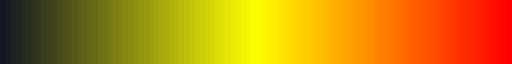

In [30]:
color_list = [(0, pitch.pitch_color), (0.5, "yellow"), (1, "red")]
def get_custom_cmap(cmap_name,color_list,N=int()):
    cust_cmap = LinearSegmentedColormap.from_list(cmap_name, color_list, N=N)
    return cust_cmap

get_custom_cmap("customcmap",color_list=color_list, N=100)


Text(1, 0.7, 'VIZ BY: MURAT SEYHAN')

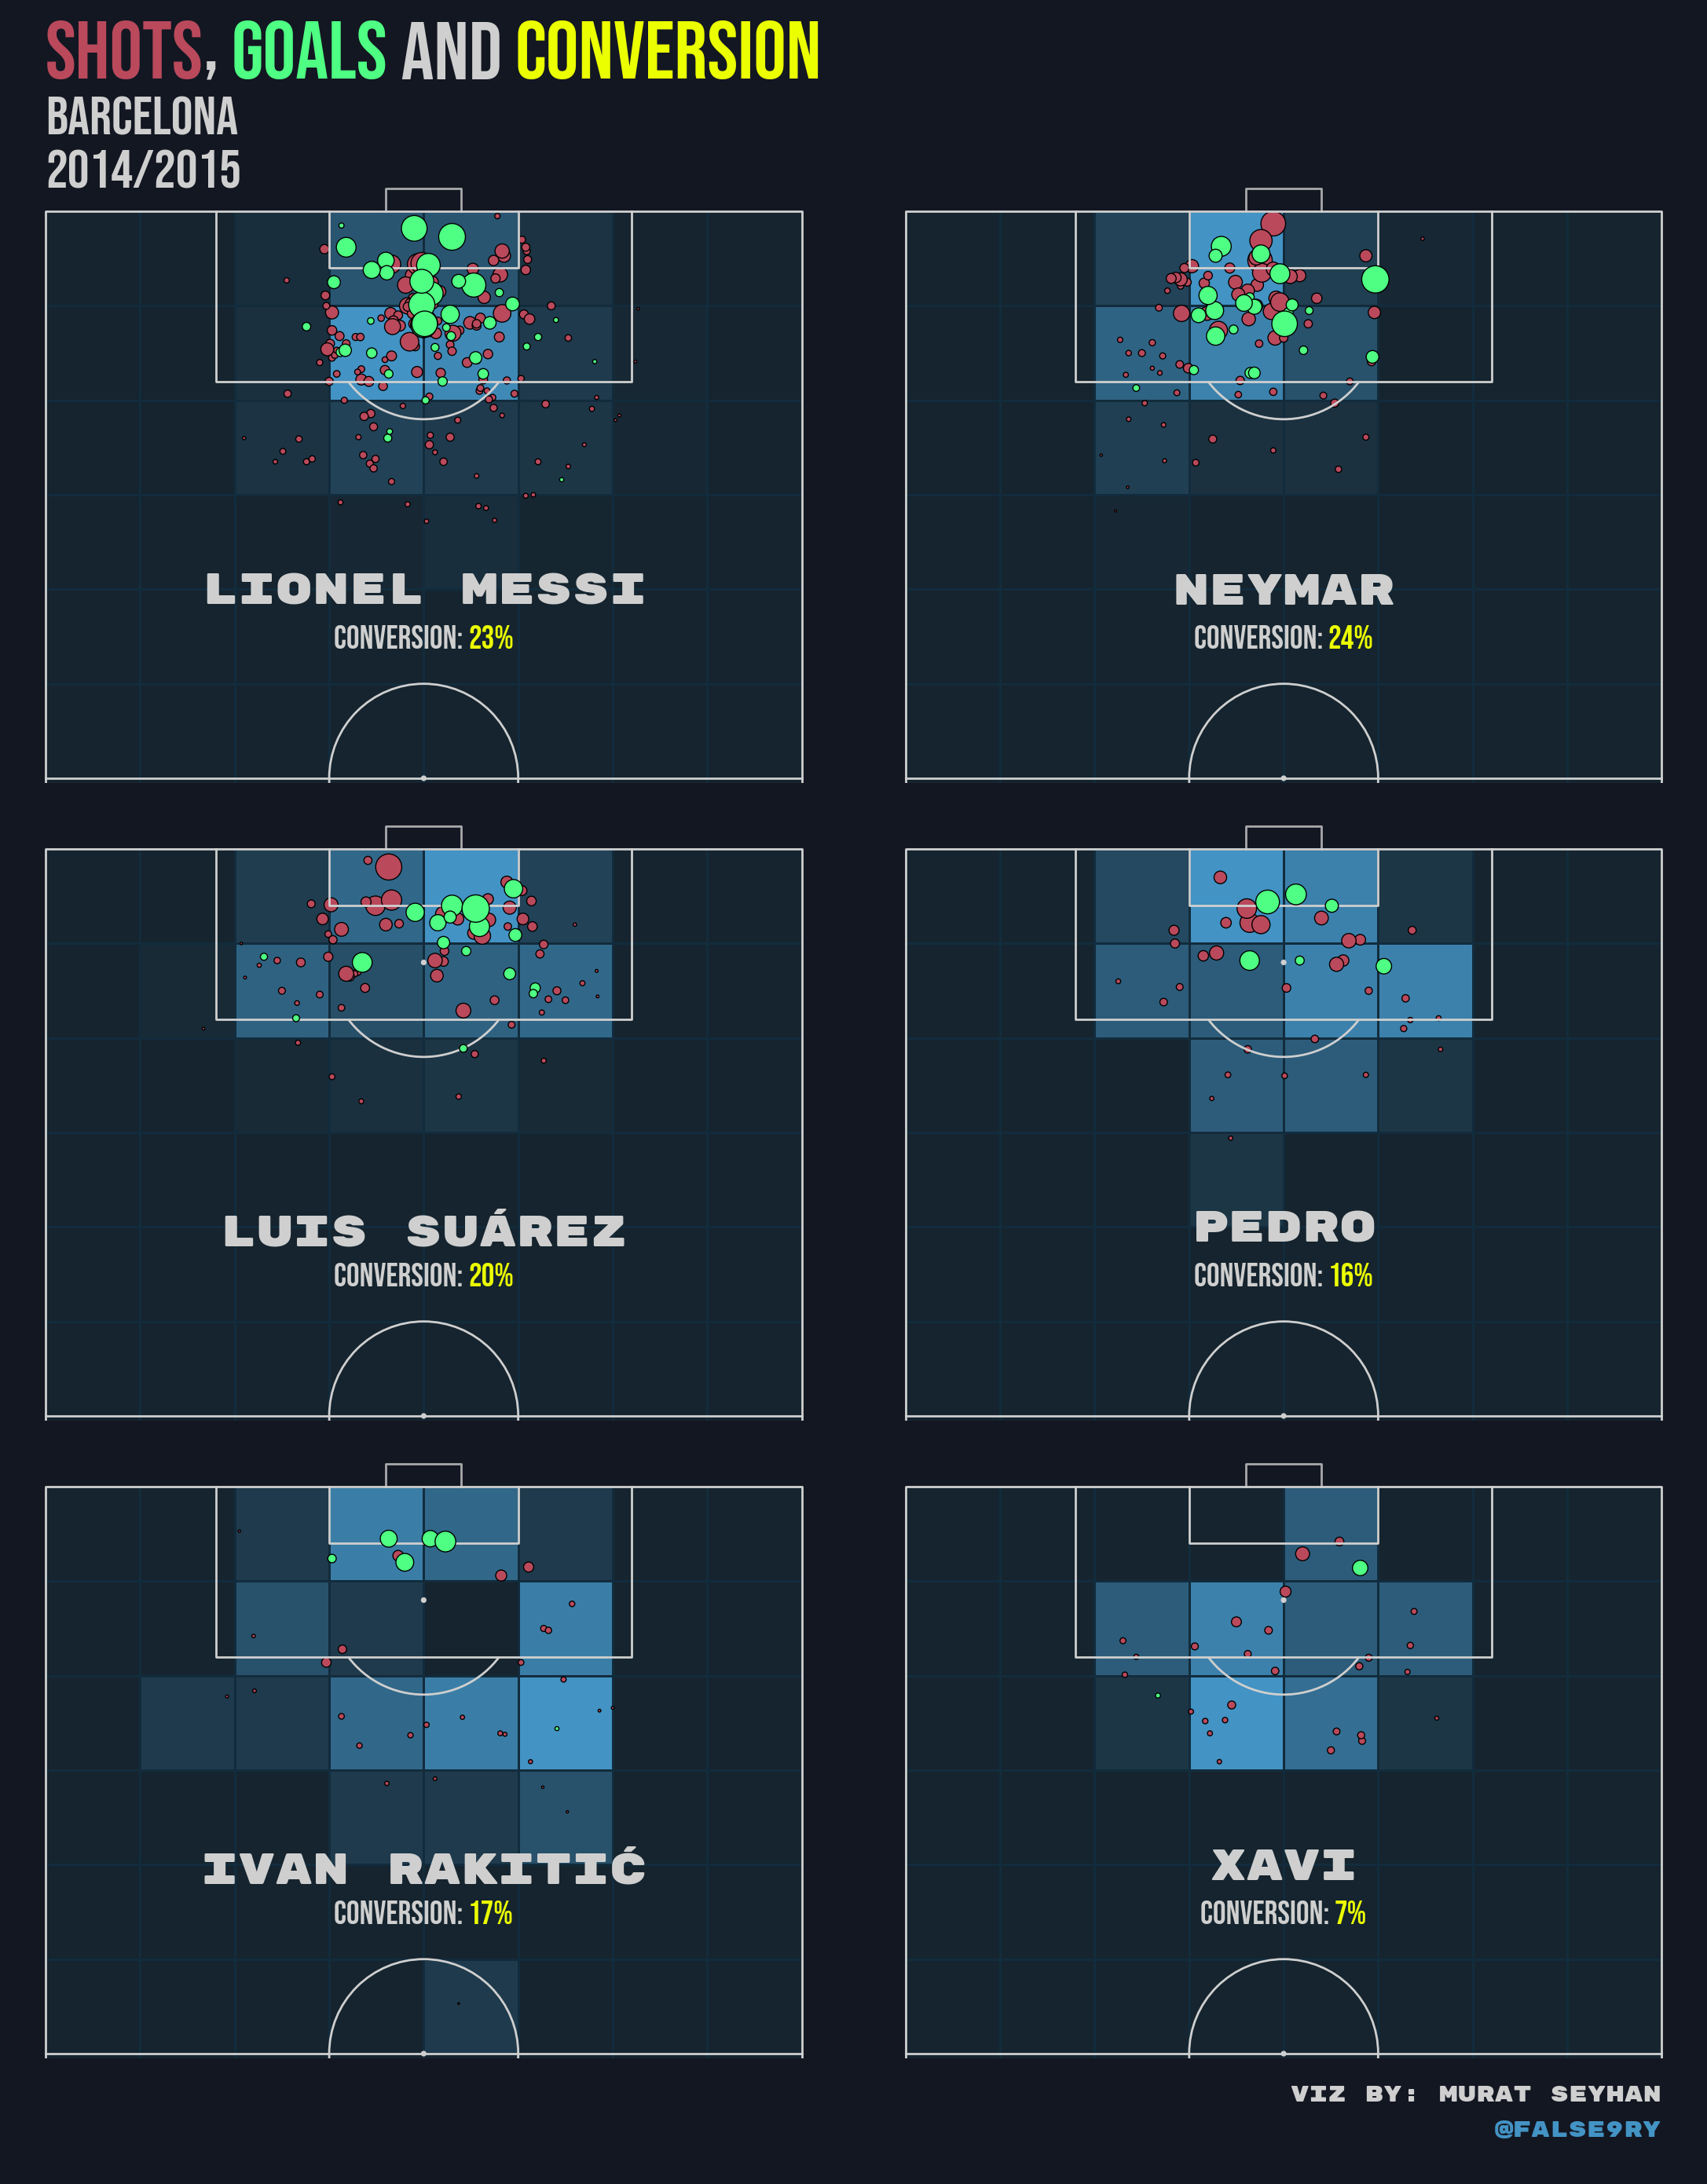

In [204]:
%run vizFunc.py

pitch = VerticalPitch(pad_bottom=0.5,
        half=True,
        goal_type='box',
        goal_alpha=0.8,
        line_zorder = 2,
        line_color='#cfcfcf',
        pitch_color = "#131722",
        pitch_type='statsbomb')

fig, axs = pitch.grid(nrows=3,
                        ncols=2,
                        grid_width=0.88,
                        left=0.025,
                        figheight=30,
                        endnote_height=0.05,
                        endnote_space=0,
                        axis=False,
                        title_space=0.01,
                        title_height=0.06,
                        grid_height=0.8,
                        space = 0.03)

analyzer = footyviz(df_event, pitch)

analyzer.navigate(type_name='Shot',team_name_x='Barcelona')
# understand axes' grids and define them in variables.
grid_row_len = len(axs["pitch"]) # define grid's row count
grid_col_len = len(axs["pitch"][0]) # define grid's column count
grid_size = grid_row_len * grid_col_len # define grid size

fig.set_facecolor(analyzer.backgroundColor)

# get most shots based on grid size to fill all grids with players. defining grids will determine how many players it'll visualize
most_shots = analyzer.data.groupby("player_id").agg({"type_name":"count"}).sort_values(by="type_name",ascending=False).head(grid_size).index.tolist()
playerNameFm = FontManager(url=config["fonts"]["rubik"])
captionFm = FontManager(url=config["fonts"]["bebas_neue"])
nameTagFm = FontManager(url=config["fonts"]["roboto_regular"])

for i in [((index // grid_col_len), (index % grid_col_len), value) for index, value in enumerate(most_shots)]:
    playerData = analyzer.data[analyzer.data.player_id == i[2]]
    playerNick = playerData.player_nickname.iloc[0]
    teamName = playerData.team_name_x.iloc[0]
    bs = pitch.bin_statistic(playerData.x, playerData.y, bins=(12, 8))
    heatmap = pitch.heatmap(bs, 
                            edgecolors='#122c3d',
                            ax=axs["pitch"][i[0]][i[1]],
                            cmap=get_config_cmap("pearl_earring",n=100))
    goals = playerData[playerData.outcome_name == "Goal"]
    nogoals = playerData[playerData.outcome_name != "Goal"]
    conv_rate = len(goals) / len(playerData)
    goals_scatty = pitch.scatter(goals.x, goals.y, s=goals.shot_statsbomb_xg * 700, zorder =3,
                        ec='black', color='#4EFF83',ax=axs["pitch"][i[0]][i[1]])
    others_scatty = pitch.scatter(nogoals.x, nogoals.y, s=nogoals.shot_statsbomb_xg * 700,
                        ec='black', color='#ba495c',ax=axs["pitch"][i[0]][i[1]])
    ax_text(40, 80, 
            f'''{playerNick}''',
        ax=axs["pitch"][i[0]][i[1]],
        fontsize=40,
        va='center',
        ha='center',
        color = pitch.line_color,
        weight='bold',
        fontproperties=playerNameFm.prop
        ,zorder = 5)
    ax_text(40, 75, 
            f'''Conversion: <{conv_rate:.0%}>''',
        ax=axs["pitch"][i[0]][i[1]],
        fontsize=30,
        va='center',
        ha='center',
        color = pitch.line_color,
        weight='bold',
        fontproperties=captionFm.prop
        , highlight_textprops=[{"color": '#EBFF01'}]
        ,zorder = 5)

ax_text(0, 0.5, 
        f'''<Shots>, <Goals> and <Conversion>''',
    ax=axs["title"],
    fontsize=75,
    va='bottom',
    ha='left',
    color = pitch.line_color,
    weight='bold',
    fontproperties=captionFm.prop
    , highlight_textprops=[{"color": '#BA495C'},{"color": '#4EFF83'},{"color": '#EBFF01'}]
    ,zorder = 5)

ax_text(0, 0.24,
        f'''{teamName}''',
    ax=axs["title"],
    fontsize=50,
    va='center',
    ha='left',
    color = pitch.line_color,
    weight='bold',
    fontproperties=captionFm.prop
    ,zorder = 5)

ax_text(0, 0, 
        f'''{analyzer.seasonNameList[0]}''',
    ax=axs["title"],
    fontsize=50,
    va='top',
    ha='left',
    color = pitch.line_color,
    weight='bold',
    fontproperties=captionFm.prop
    ,zorder = 5)

axs['endnote'].text(1, 0.4, '@false9ry',color="#4393c4" ,
                    va='center', ha='right', fontsize=20,
                    fontproperties=playerNameFm.prop)
axs['endnote'].text(1, 0.7, 'VIZ BY: MURAT SEYHAN', color=pitch.line_color,
                    va='center', ha='right', fontsize=20,
                    fontproperties=playerNameFm.prop, )

In [132]:
colors

{'Goal': '#4EFF83', 'Other': '#ba495c'}

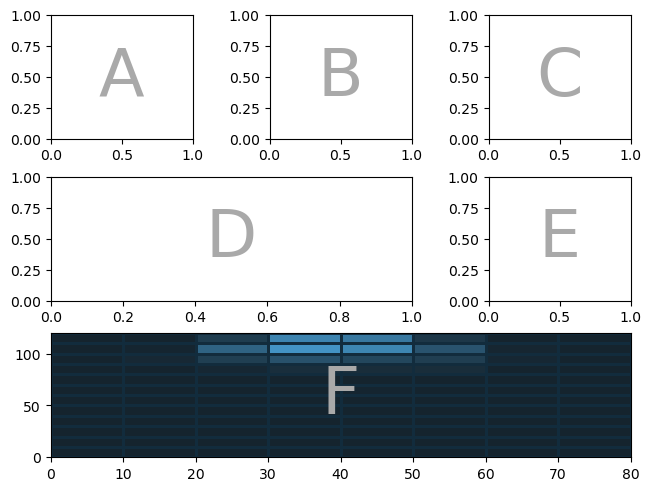

In [20]:

# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABC
    DDE
    FFF
    """
)
identify_axes(axd)
bs = pitch.bin_statistic(analyzer.data.x, analyzer.data.y, bins=(12, 8))
heatmap = pitch.heatmap(bs, 
                        edgecolors='#122c3d',
                        ax=axd["F"],
                        cmap=get_config_cmap("pearl_earring",n=100))


In [114]:
analyzer = footyviz(df_event, pitch)
analyzer.navigate(type_name="Shot",team_name_x='Barcelona')
analyzer.data.groupby("player_id").agg({"type_name":"count"}).sort_values(by="type_name",ascending=False).head(4).index.tolist()
analyzer.data.columns.tolist()
analyzer.data.outcome_name.value_counts()

outcome_name
Off T               206
Saved               161
Blocked             127
Goal                111
Wayward              17
Post                 16
Saved Off Target      3
Saved to Post         1
Name: count, dtype: int64

In [5]:
seasonName = [value for value in analyzer.data.season_name.unique() if not (isinstance(value, float) and np.isnan(value))][0]
seasonName

'2014/2015'

In [6]:
print(config["fonts"]["roboto_regular"])

https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf


player_nickname
Lionel Messi    2529
Name: count, dtype: int64

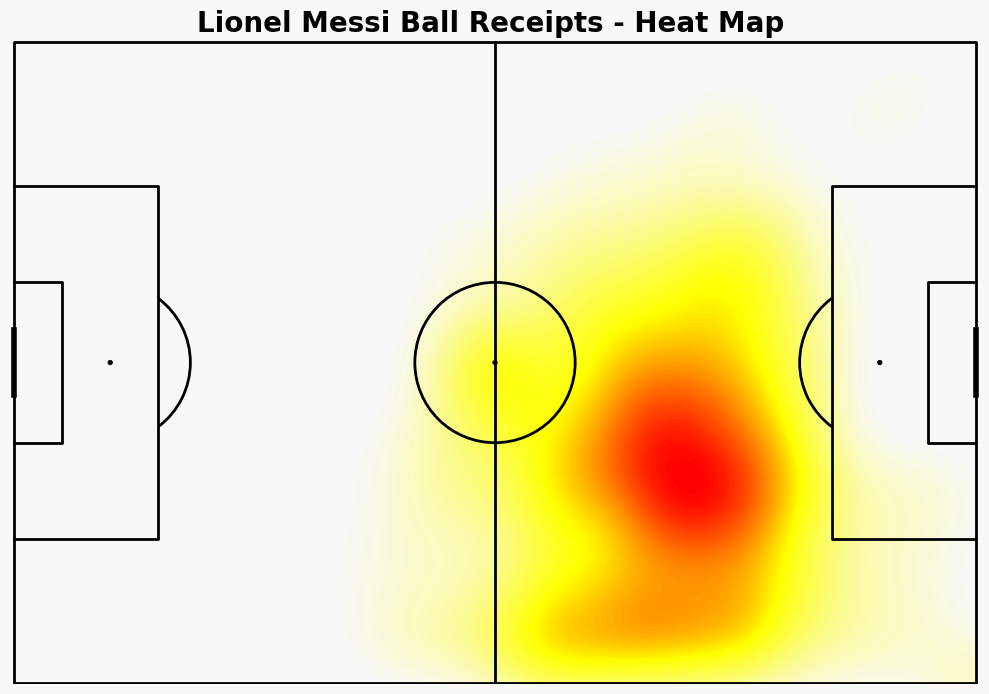

In [4]:
pitchtry = Pitch(pitch_type='statsbomb', pitch_color=whites4background[10],line_zorder=2,line_color='k')  #FFFFFF  #40A03F  #FFFEDF
analyzer = footyviz(df_event, pitchtry)
analyzer.navigate(type_name='Pass',team_name_x='Barcelona',player_nickname='Lionel Messi')
title = f"{analyzer.data.player_nickname.max()} Ball Receipts - Heat Map "
analyzer.heatmap(title)
#analyzer.scattyDotColor = 'black'
#analyzer.scatty()
analyzer.data.player_nickname.value_counts()

Axes(0.0316439,0.95;0.866712x0.01)


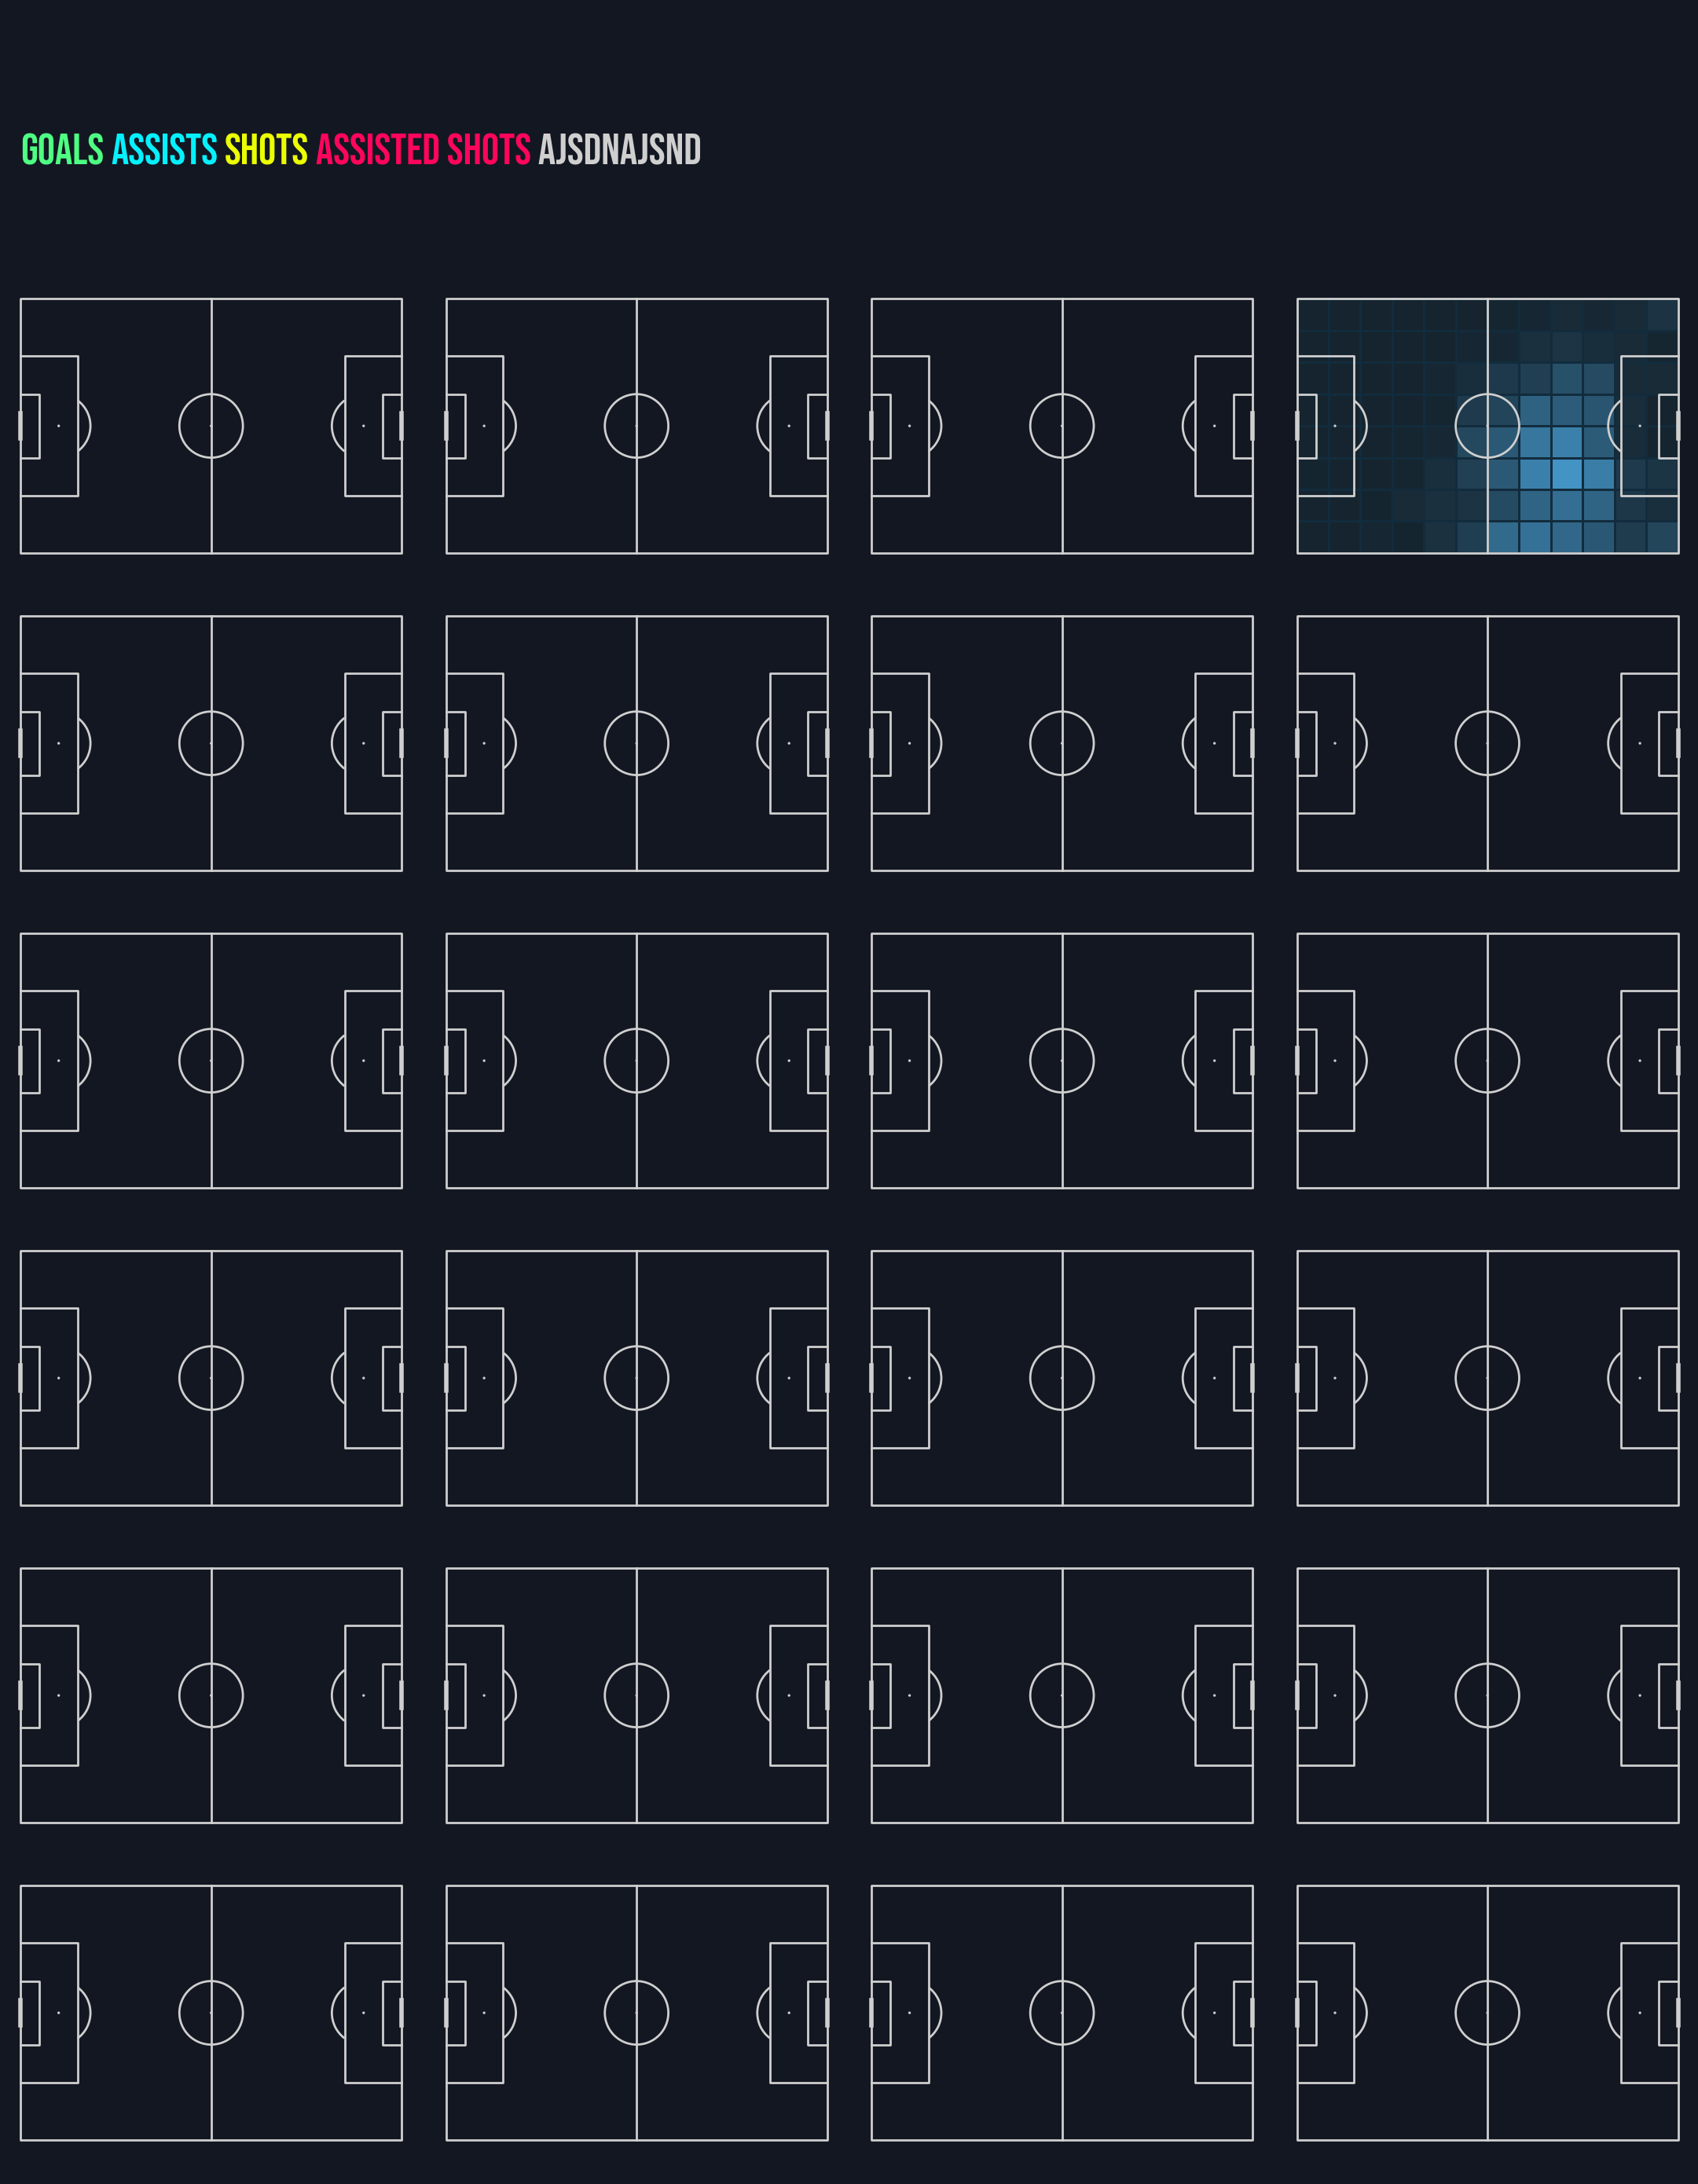

In [28]:
pitch = Pitch(pitch_type='statsbomb',
                pad_top = 10,
                line_zorder=2,
                line_color='#cfcfcf',
                pitch_color='#131722')
fig, axs = pitch.grid(nrows=6,
                        ncols=4,
                        grid_width=0.88,
                        left=0.025,
                        figheight=30,
                        endnote_height=0.01,
                        endnote_space=0,
                        axis=False,
                        title_space=0.1,
                        title_height=0.01,
                        grid_height=0.8)

bs = pitch.bin_statistic(analyzer.data.x, analyzer.data.y, bins=(12, 8))
heatmap = pitch.heatmap(bs, edgecolors='#122c3d', ax=axs["pitch"][0][3], cmap=pearl_earring_cmap_100)
fm = FontManager(url=config["fonts"]["bebas_neue"])

ax_text(0, -5, '<Goals> <Assists> <Shots> <Assisted Shots> ajsdnajsnd',
    ax=axs['title'],
    fontsize=40,
    va='center',
    ha='left',
    color = pitch.line_color,
    weight='bold',
    fontproperties=fm.prop,
    highlight_textprops=[{"color": '#4EFF83'},{"color": '#05F1FF'},{"color": '#EBFF01'},{"color":'#FF055B'}])
fig.set_facecolor("#131722")
print(axs['title'])

TypeError: 'Axes' object is not subscriptable

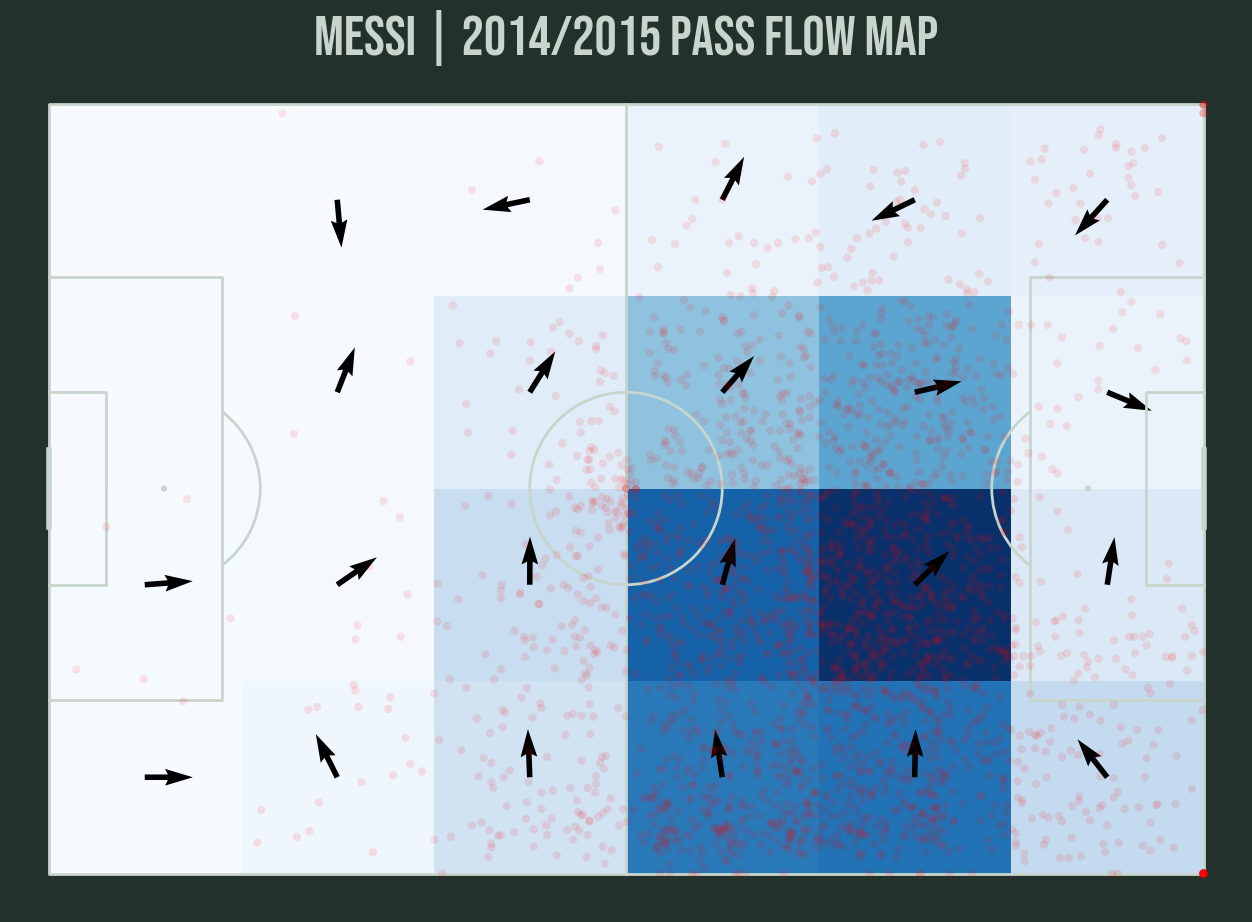

In [8]:
fm_rubik = FontManager('https://github.com/google/fonts/blob/main/ofl/bebasneue/BebasNeue-Regular.ttf?raw=true')

pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
bins = (6, 4)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(analyzer.data.x, analyzer.data.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(analyzer.data.x, analyzer.data.y, analyzer.data.end_x, analyzer.data.end_y,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=ax)

seasonName = [value for value in analyzer.data.season_name.unique() if not (isinstance(value, float) and np.isnan(value))][0]
ax_title = ax.set_title(f'Messi | {seasonName} pass flow map', pad=-20,fontproperties=fm_rubik.prop,size=40, color=pitch.line_color)
sns.scatterplot(x='x', y='y', data=analyzer.data, ec=None,alpha=.1, color = 'red',zorder=3, legend=False)
#sns.scatterplot(x='end_x', y='end_y', data=analyzer.data, ec=None,alpha=.2, color = analyzer.scattyDotColor,zorder=3, legend=False)
ax_text(1, 1.5, '<Goals> <Assists> <Shots> <Assisted Shots> ajsdnajsnd',
    ax=ax['title'],
    fontsize=40,
    va='center',
    ha='left',
    color = pitch.line_color,
    weight='bold',
    fontproperties=fm.prop,
    highlight_textprops=[{"color": '#4EFF83'},{"color": '#05F1FF'},{"color": '#EBFF01'},{"color":'#FF055B'}])

In [12]:
tryer = df_event.copy()
def navigate(data, **filters):
    print(filters.items())
    query_string = ' & '.join([f'({col} == {repr(val)})' for col, val in filters.items()])
    filterFields = [*filters]
    data = data.query(query_string)

navigate(data=tryer,player_nickname='Lionel Messi',team_name_x='Barcelona')

dict_items([('player_nickname', 'Lionel Messi'), ('team_name_x', 'Barcelona')])
['player_nickname', 'team_name_x']


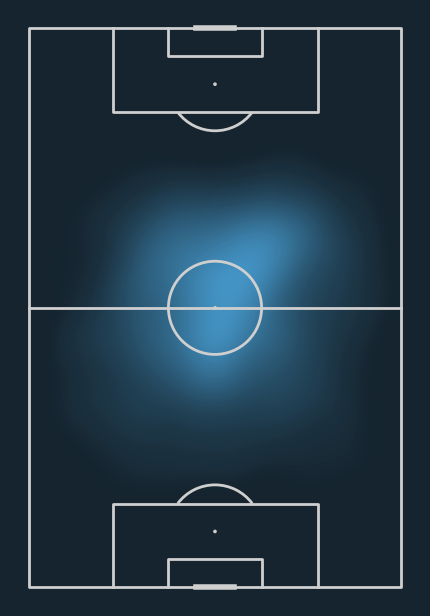

In [80]:
%run vizFunc.py
pitch = VerticalPitch(line_color='#cfcfcf', line_zorder=2, pitch_color='#15242e')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_cmap_007.png'
pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100) # important to pass 100 color cmap
kdeplot = pitch.kdeplot(analyzer.data.x, analyzer.data.y, ax=ax, cmap=pearl_earring_cmap_100, fill=True, levels=100)
fig.set_facecolor(pitch.pitch_color)

In [ ]:
# We will use mplsoccer's grid function to plot a pitch with a title axis.
pitch = Pitch(pitch_type='statsbomb', pad_bottom=1, pad_top=1,
              pad_left=1, pad_right=1,
              line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
fig, axs = pitch.grid(figheight=8, endnote_height=0.03, endnote_space=0,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False)
fig.set_facecolor('#22312b')

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='Blues')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=axs['pitch'])

# title / endnote
font = FontManager()  # default is loading robotto font from google fonts
axs['title'].text(0.5, 0.5, f'{team1} pass flow map vs {team2}',
                  fontsize=25, fontproperties=font.prop, va='center', ha='center')
axs['endnote'].text(1, 0.5, '@your_amazing_tag',
                    fontsize=18, fontproperties=font.prop, va='center', ha='right')

plt.show()  # If you are using a Jupyter notebook you do not need this line

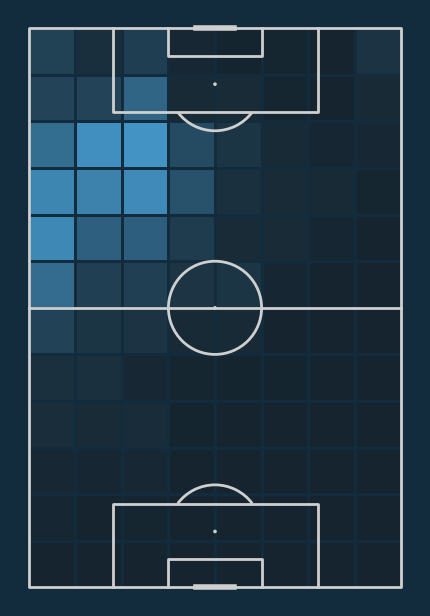

In [126]:
pitch = VerticalPitch(line_color='#cfcfcf', line_zorder=2, pitch_color='#122c3d')
fig, ax = pitch.draw(figsize=(4.4, 6.4))
bs = pitch.bin_statistic(analyzer.data.x, analyzer.data.y, bins=(12, 8))
heatmap = pitch.heatmap(bs, edgecolors='#122c3d', ax=ax, cmap=pearl_earring_cmap_100)
fig.set_facecolor(pitch.pitch_color)

## PLAYGROUND

#['#CCCCCC','#9656A2','#B02C3F']

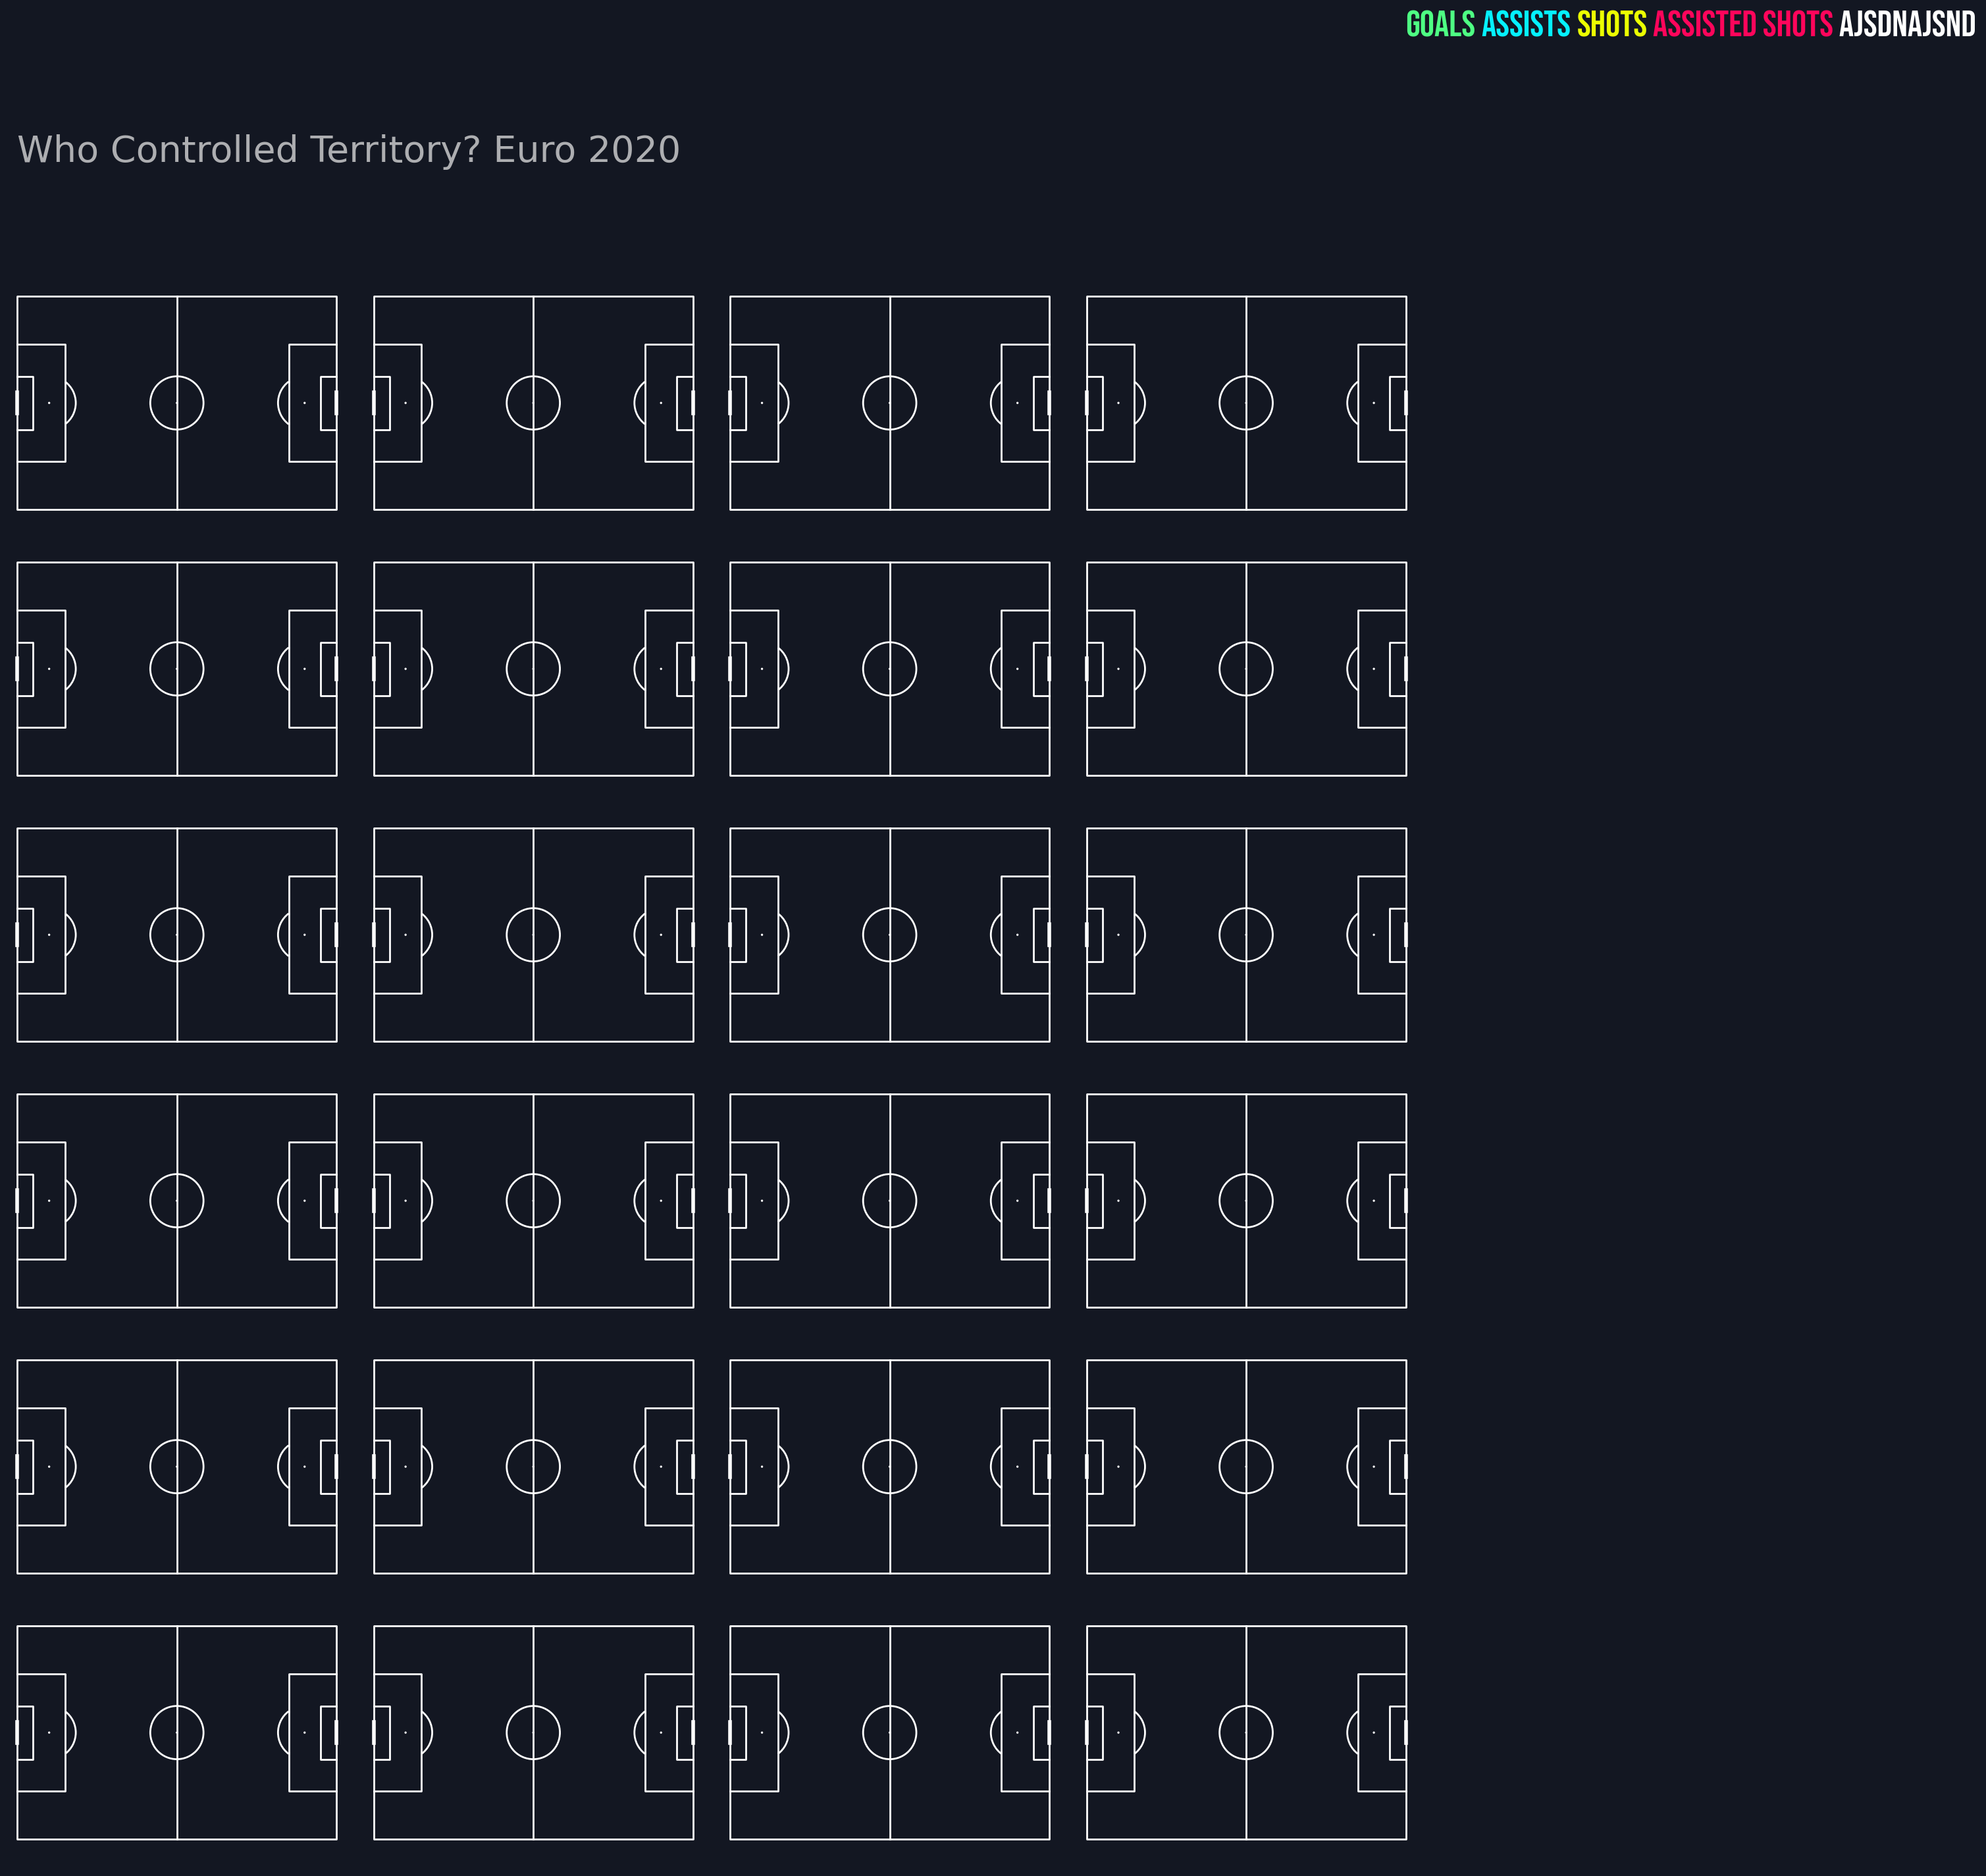

In [81]:
fm = FontManager(config["fonts"]["bebas_neue"])
pitch = Pitch(pitch_type='statsbomb',
                pad_top = 10,
                line_zorder=2,
                line_color='#FFFFFF',
                pitch_color='#131722')
fig, axs = pitch.grid(nrows=6,
                        ncols=4,
                        grid_width=0.88,
                        left=0.025,
                        figheight=30,
                        endnote_height=0.01,
                        endnote_space=0,
                        axis=False,
                        title_space=0.11,
                        title_height=0.01,
                        grid_height=0.8)

bins = (6, 4)

fig.set_facecolor("#131722")

#Graphic text
axs['title'].text(0,
                    -5,
                    'Who Controlled Territory? Euro 2020',
                    fontsize=40,
                    va='center',
                    ha='left',
                    color = "#ADAEB1")

ax_text(1, 1.5, '<Goals> <Assists> <Shots> <Assisted Shots> ajsdnajsnd',
    ax=axs['title'],
    fontsize=40,
    va='center',
    ha='left',
    color = pitch.line_color,
    weight='bold',
    fontproperties=fm.prop,
    highlight_textprops=[{"color": '#4EFF83'},{"color": '#05F1FF'},{"color": '#EBFF01'},{"color":'#FF055B'}])

In [62]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=whites4background[10],line_zorder=2,line_color='k')  #FFFFFF  #40A03F  #FFFEDF

font_url = 'https://github.com/google/fonts/blob/main/ofl/bebasneue/BebasNeue-Regular.ttf?raw=true'
fm = FontManager(url=font_url)
fig, ax = plt.subplots()

fig_text(100, 103.5, '<Goals> <Assists> <Shots> <Assisted Shots>',
    fontsize=40,
    va='center',
    ha='left',
    color = pitch.line_color,
    weight='bold',
    fontproperties= fm.prop,
    highlight_textprops=[{"color": '#4EFF83'},{"color": '#05F1FF'},{"color": '#EBFF01'},{"color": '#FF055B'}])

Error in callback <function flush_figures at 0x16ac2c400> (for post_execute):


KeyboardInterrupt: 

In [5]:

fig_text(x=0.03, y=0.89, fontsize=30, s='<Contested Zones> Where no team has more than 55% of total touches',
          va='center',
          ha='left',
          color = '#989898',
          weight='bold',
          fontproperties=fm.prop,
          highlight_textprops=[{"color": '#ffc505'}],
        ax=ax)


<Figure size 640x480 with 0 Axes>

Text(0.5, 0.5, 'Good content.')

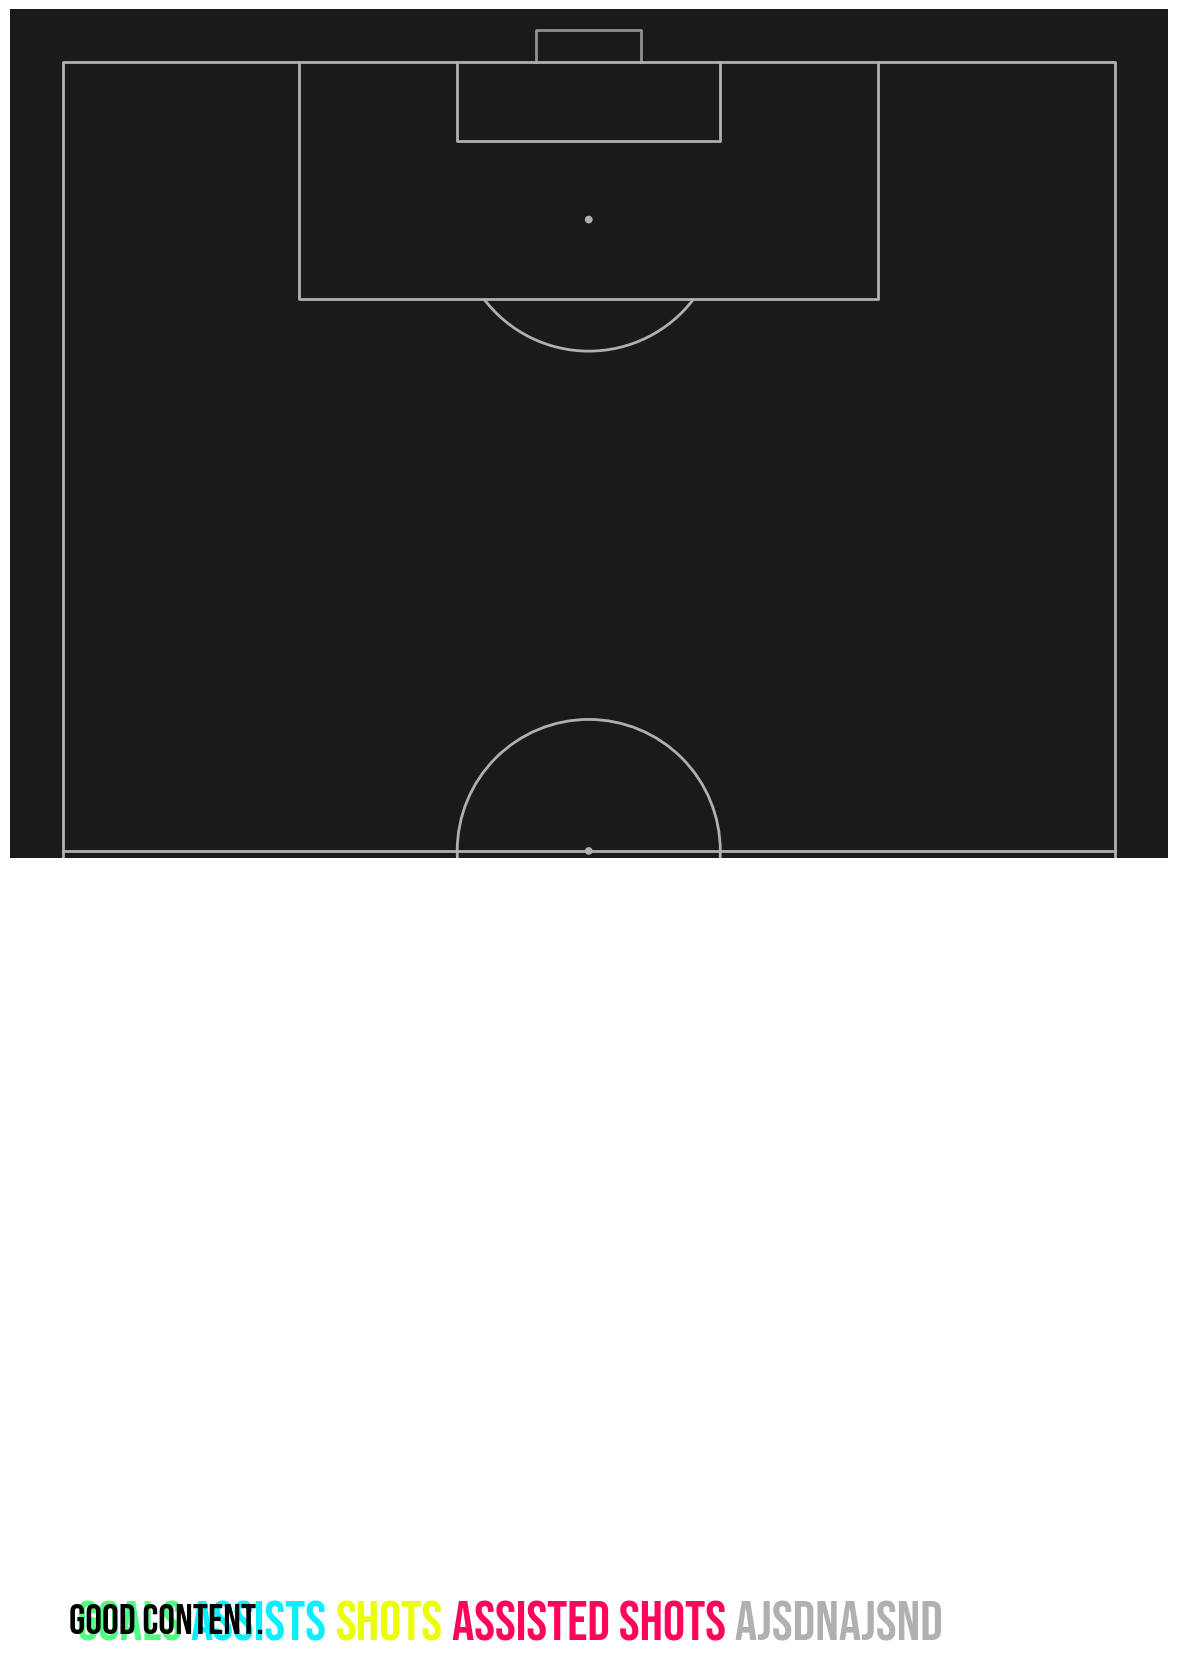

In [63]:
pitch = VerticalPitch(pad_bottom=0.5,
        half=True,
        goal_type='box',
        goal_alpha=0.8,
        pitch_color = "#1A1A1A",
        pitch_type='statsbomb')

fig, ax = pitch.draw(figsize=(24, 20))

fm_rubik = FontManager('https://github.com/google/fonts/blob/main/ofl/bebasneue/BebasNeue-Regular.ttf?raw=true')
ax_text(1, 1.5, '<Goals> <Assists> <Shots> <Assisted Shots> ajsdnajsnd',
    fontsize=40,
    va='center',
    ha='left',
    color = pitch.line_color,
    weight='bold',
    fontproperties=fm_rubik.prop,
    highlight_textprops=[{"color": '#4EFF83'},{"color": '#05F1FF'},{"color": '#EBFF01'},{"color":'#FF055B'}])

ax.add_patch(patches.Rectangle((10, 20), 6,1, facecolor = '#1A1A1A' , edgecolor = '#4EFF83', hatch = '///'))
ax.text(x=0.5, y=0.5, s="Good content.", fontproperties=fm_rubik.prop, size=30)

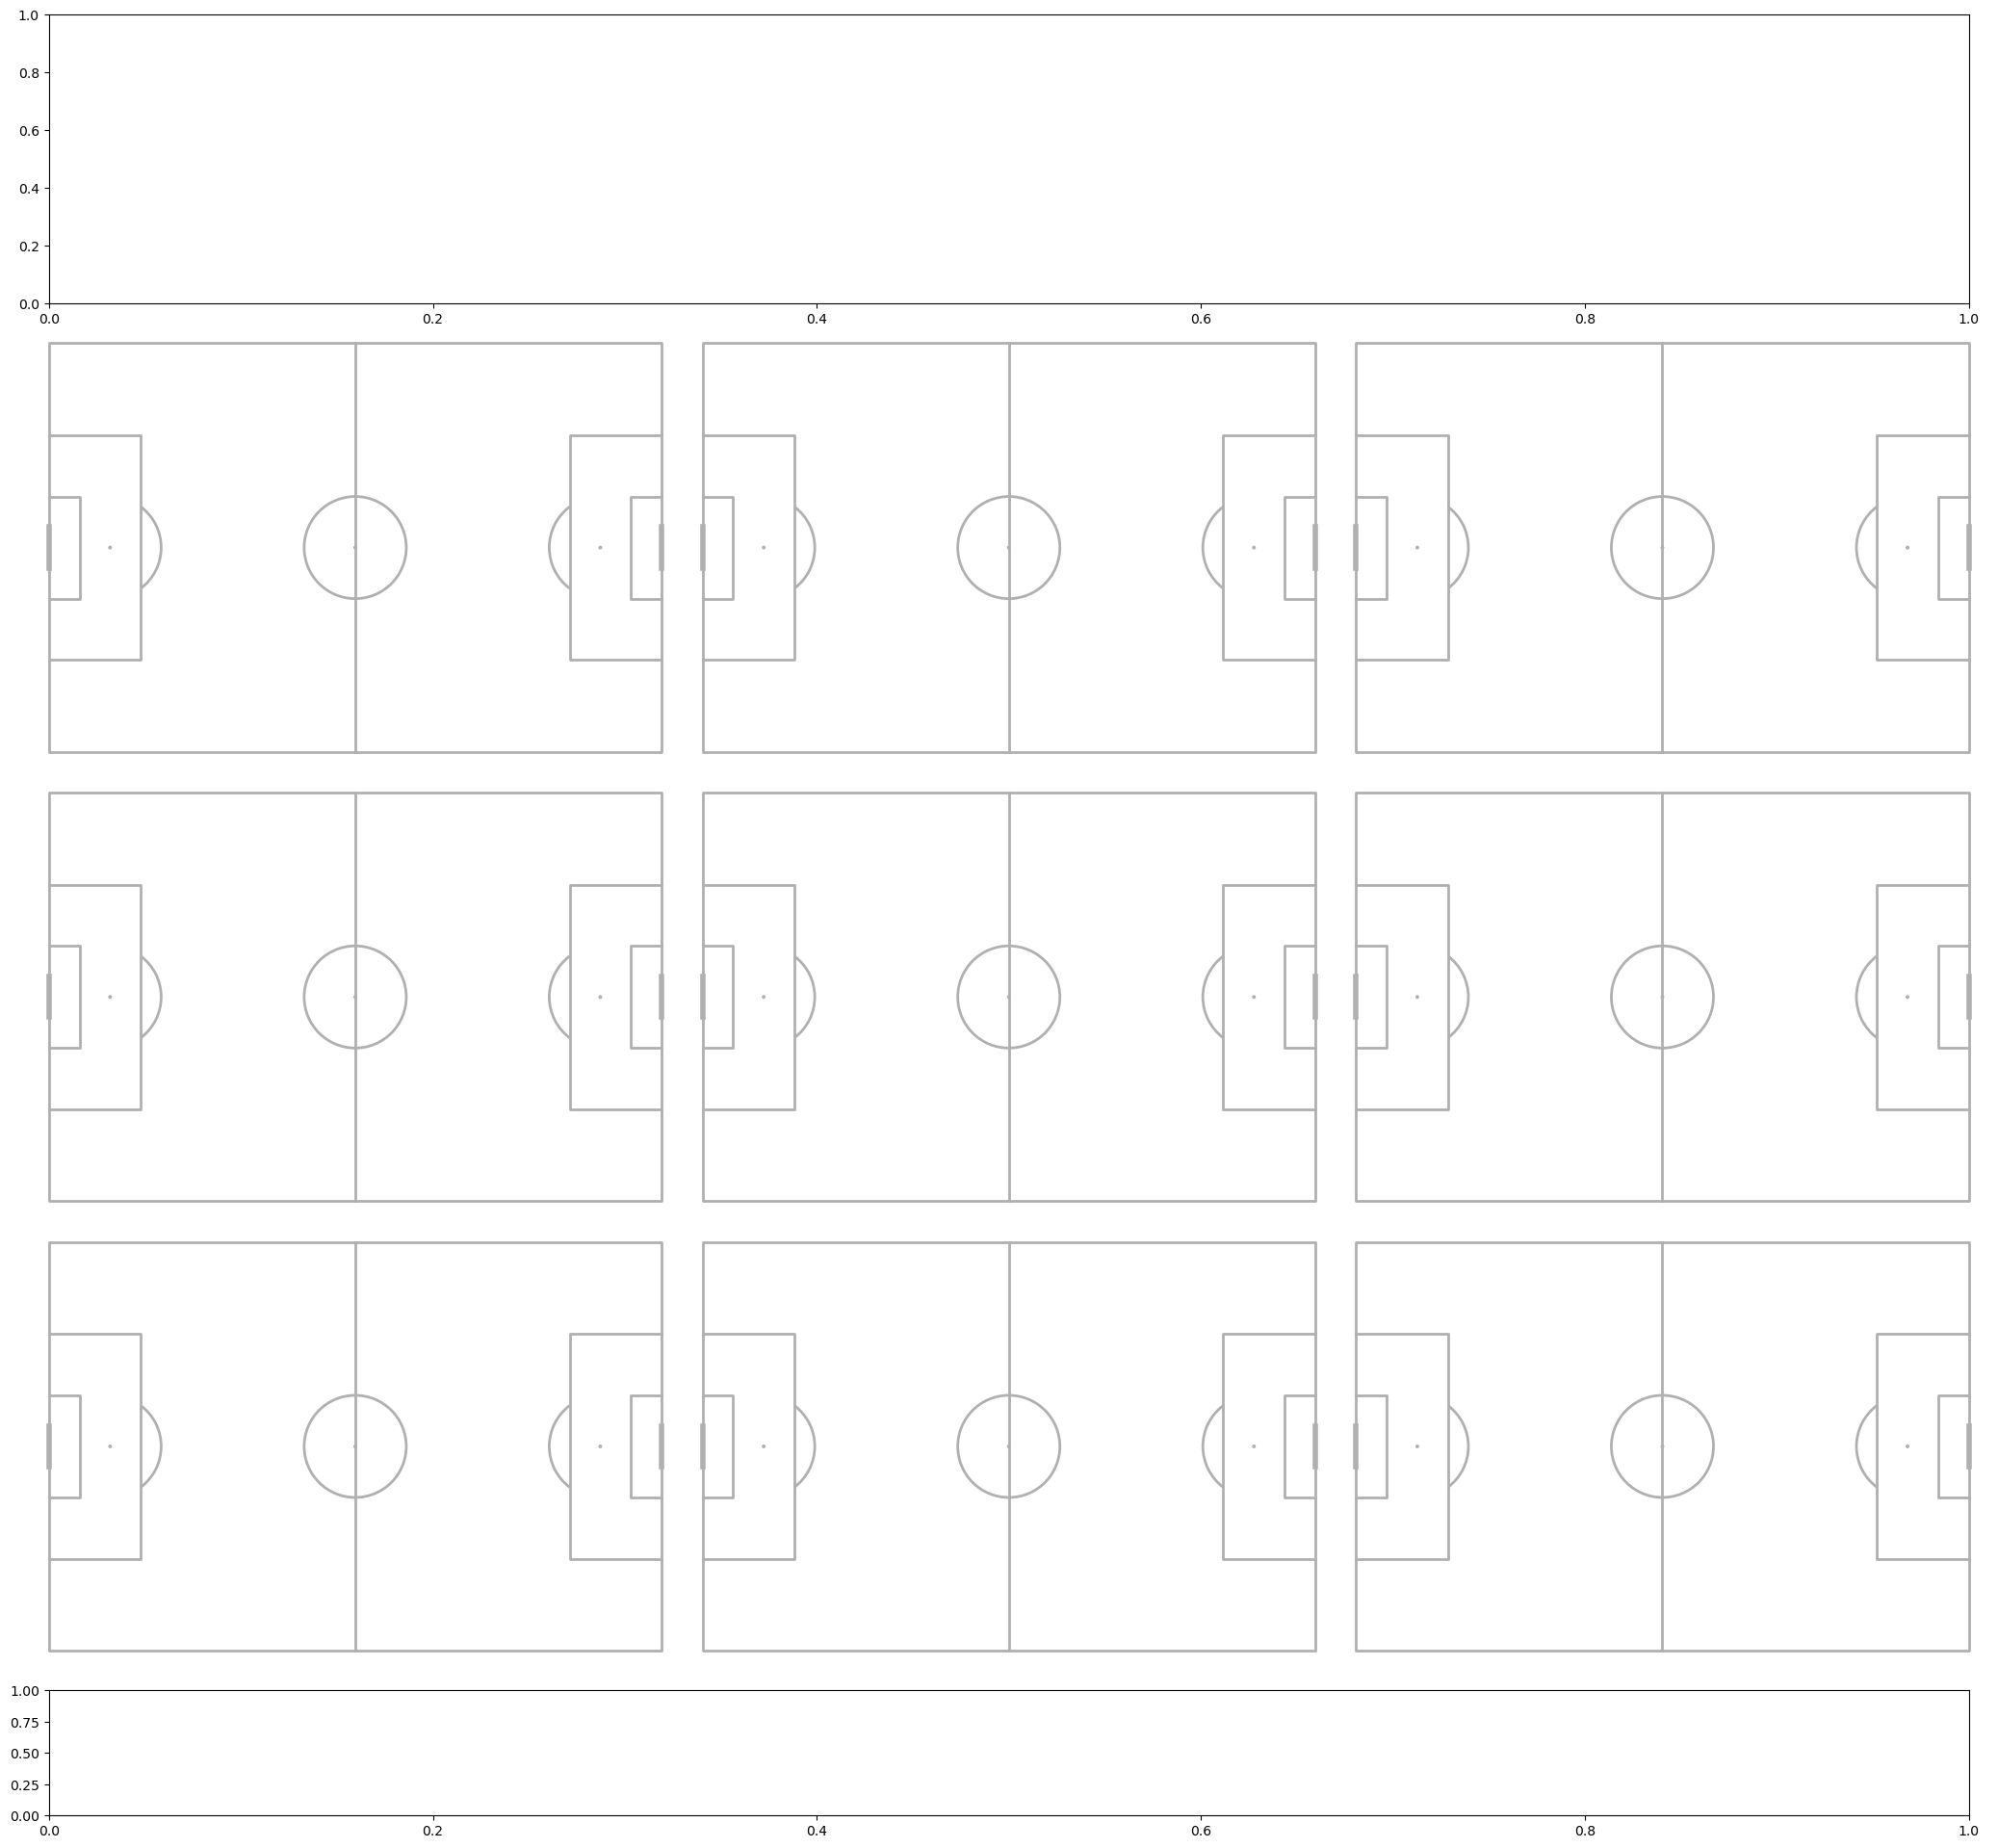

In [55]:
pitch = Pitch()
fig, axs = pitch.grid(nrows=3, ncols=3, figheight=20,
                      # the grid takes up 71.5% of the figure height
                      grid_height=.7,
                      # 5% of grid_height is reserved for space between axes
                      space=0,
                      # centers the grid horizontally / vertically
                      left=None, bottom=None)